In [1]:
#Mounting Google Drive to pass on documents easier
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
cardiovasc = pd.read_csv('/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/CA05/cvd_data.csv')

In [4]:
cardiovasc.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


**Labelling the meaning of columns**

cvd_4types - 0 No risk, 1 risk present

age_s1 - Age

Race - 1 - White, 2 - Black, 3 – Other

educat - Higher the label -> more years in education

mstat - Marital Status 1: married 2: widowed 3: divorced/separated 4: never married 8: unknown/refused

hip - hip size

neck20 - not listed 

waist - waist size

av_weight_kg - weight

cgpkyr - Cigarette packs per year

tea15 - tea per day

srhype - Self-reported hypertension 0 no 1 yes

parrptdiab - History of diabetes 0 no 1 yes

bend25 - QOL bending actions 1 bad 2 soso 3 good

happy25 - happy 1: All of the time 2: Most of the time 3: A good bit of the time 4: Some of the time 5: A little of time 6: None of the time

tired25 - tired 1: All of the time 2: Most of the time 3: A good bit of the time 4: Some of the time 5: A little of time 6: None of the time

hlthlm25 - health limited social activity 1: All of the time 2: Most of the time 3: Some of the time 4: A little of the time 5: None of the time 

**Part 1 - build a binary classifier model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic
Regression Model with the best performance possible**

In [5]:
#Data Cleaning
cardiovasc.isnull().sum()
#No null values

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [38]:
#Before running the logistic regression model, I will run a correlation test and determine which variables to use and not use

#Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, 
#and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each 
#independent variable, you don’t need to reduce severe multicollinearity.

#Source
#"https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/#:~:text=Fortunately%2C%20there%20is%20a%20very,VIF%20for%20each%20independent%20variable."

#Since I will be focusing more on the precision of the predictions, specifically ROC, I would just get straight into the setup of the logistic regression
#I will set Y value as the label and X value as the other variables
#X =  cardiovasc.cvd_4types
X =  cardiovasc.iloc[:,1:]
y = cardiovasc.loc[:,'cvd_4types']

In [39]:
X.shape

(3242, 16)

In [40]:
y.shape

(3242,)

In [56]:
#Split X y into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [65]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1e40, solver = 'newton-cg')
fitted_model = clf.fit(X, y)

In [144]:
#utilize newton-cg to handle multiclass problems and multinomial loss
#Setup c values to be tested 
from sklearn.metrics import accuracy_score
results = []
c_values = [1e-100, 1e-50, 1e-35, 1e-15, 1e-5, 1]

def prediction():
  for value in c_values:
    clf = linear_model.LogisticRegression(C=value, solver= 'newton-cg')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append(accuracy)

prediction()
print(results)

[0.6078914919852034, 0.6078914919852034, 0.6078914919852034, 0.6078914919852034, 0.6424167694204685, 0.6979038224414303]


From the results we can see that the lower the value of c means there is less regularization. This led to the accuracy score being the lowest. However, if I upped it to the value 1, it would produce the maximum accuracy of 69.7%. Going above the value 1 would generate the same number

**Part 2, sort influence of variables by decreasing order**

In [140]:
#binary classifier model
from sklearn.linear_model import LogisticRegression
import numpy as np
m = LogisticRegression()
m.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
m.fit(X / np.std(X, 0), y)
print(m.coef_)
variablecoef = []
variablecoef.append(m.coef_)

[[ 8.65518062e-03 -3.71281981e-01  1.82519151e-01 -1.36923714e-01
  -6.03138231e-01 -1.82348735e-01  1.12619581e+00 -2.33006991e-01
   6.11148106e-04 -6.65511918e-02  7.27625551e-02  1.59314337e-01
   8.81622694e-02 -8.32966741e-02  1.17355362e-01 -3.62121046e-01]]


In [108]:
variablecoeff = pd.DataFrame(m.coef_)

In [109]:
variablecoeff.rename(columns = {0: 'age_s1',
                                1:	'race',
                                2:	'educat',
                                3:	'mstat',
                                4:	'hip',
                                5:	'neck20',
                                6:	'waist',
                                7:	'av_weight_kg',
                                8:	'cgpkyr',
                                9:	'tea15',
                                10:	'srhype',
                                11:	'parrptdiab',
                                12:	'bend25',
                                13:	'happy25',
                                14:	'tired25',
                                15:	'hlthlm25'}, inplace = True)
variablecoeff.head()

,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0.008655,-0.371282,0.182519,-0.136924,-0.603138,-0.182349,1.126196,-0.233007,0.000611,-0.066551,0.072763,0.159314,0.088162,-0.083297,0.117355,-0.362121


In [110]:
variablecoeff = variablecoeff.T

In [115]:
variablecoeff.rename(columns = {0: 'coefficient'}, inplace = True)
variablecoeff

,coefficient
age_s1,0.008655
race,-0.371282
educat,0.182519
mstat,-0.136924
hip,-0.603138
neck20,-0.182349
waist,1.126196
av_weight_kg,-0.233007
cgpkyr,0.000611
tea15,-0.066551


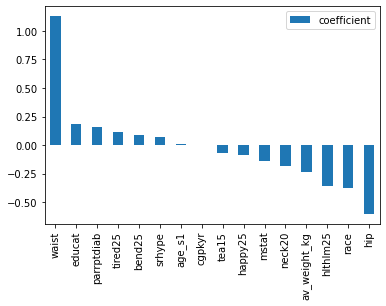

In [113]:
variablecoeff.sort_values('coefficient', ascending=False).plot.bar()

In [127]:
import pandas as pd
confusionmatrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,146,172
1,71,422


In [137]:
#fpr = FP / (FP+TN)
#tpr = TP / (TP+FN)
fpr = 71/(71+422)
tpr = 146 / (146+172)

In [135]:
#Calculating the AUC score
from sklearn.metrics import roc_curve, roc_auc_score
roc_score = roc_auc_score(y_test, y_pred)

0.6575516348374093

In [138]:
roc_fpr, roc_tpr, _ = roc_curve(y_test, y_pred)

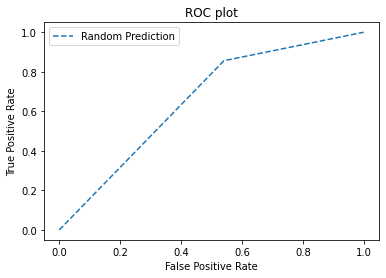

In [139]:
#Graphing the ROC curve
import matplotlib.pyplot as plt
plt.plot(roc_fpr, roc_tpr, linestyle = '--', label = 'Random Prediction' % roc_score)
         
#Title 
plt.title('ROC plot')
#Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#Show Legend
plt.legend()

plt.show()

In [145]:
#Precision Score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7104377104377104

In [146]:
#Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8559837728194726

In [147]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.7764489420423183